In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### CENTRAL LIMITING THEOREM


The sampling distribution of a statistic becomes closer to the normal distribution as the no of trial increases

The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

- Samples should be random and independent

- CLT is applicable for SD and proportions also

In [2]:
population_data =  np.random.randint(1,100000,100000)
no_of_samples = 1000
sample_size = 500

sample_mean = []
for i in range(no_of_samples):
  m = np.random.choice(population_data,size=sample_size,replace=True).mean()
  sample_mean.append(m)


In [3]:
np.random.choice(population_data,size=10,replace=True).mean()

51528.9

<AxesSubplot:ylabel='Count'>

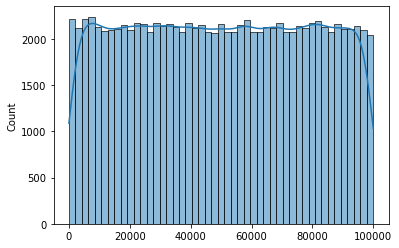

In [4]:
sns.histplot(population_data, kde=True)

<AxesSubplot:ylabel='Count'>

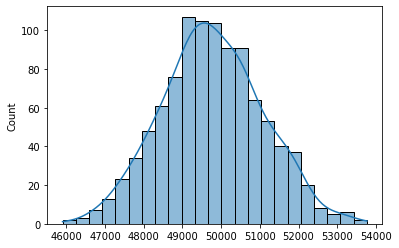

In [5]:
sns.histplot(sample_mean, kde=True)

## COVARIANCE

In [6]:
data = {
    'Age' : [12,14,18,21,24,60],
    'Weight' : [40,45,48,60,72,90]
}
df = pd.DataFrame(data)


In [7]:
df

,Age,Weight
0,12,40
1,14,45
2,18,48
3,21,60
4,24,72
5,60,90


In [8]:
age_mean = np.mean(df['Age'])
weight_mean = np.mean(df['Weight'])

df['covariance'] = (df['Age']-age_mean)-(df['Weight']-weight_mean)/np.size(df['Age']-1)

In [9]:
df

,Age,Weight,covariance
0,12,40,-9.638889
1,14,45,-8.472222
2,18,48,-4.972222
3,21,60,-3.972222
4,24,72,-2.972222
5,60,90,30.027778


In [10]:
np.cov(df['Age'], df['Weight'])

array([[316.16666667, 309.23333333],
       [309.23333333, 361.76666667]])

In [11]:
# np.load('Iris')

In [12]:
np.cov([12,14,18,21,24,60],[40,45,48,60,72,90])

array([[316.16666667, 309.23333333],
       [309.23333333, 361.76666667]])

## PEARSON CORRELATION COEFFICIENT

In [13]:
np.corrcoef([12,14,18,21,24,60],[40,45,48,60,72,90])

array([[1.       , 0.9143532],
       [0.9143532, 1.       ]])

In [14]:
def pearson_r(x, y):
    """
    Compute Pearson Correlation Coefficinet between two Feartures
    """
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)


    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(df['Age'], df['Weight'])

# Print the result
print(r)

0.9143531964883372


## SPEARMAN RANK CORRELATION

In [15]:
df2 = pd.DataFrame({'student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
                   'Age': [14,19,32,45,67,68,70,80,85,90],
                   'Weight': [40,45,50,70,71,72,73,80,80,80]})

In [16]:
df2

,student,Age,Weight
0,A,14,40
1,B,19,45
2,C,32,50
3,D,45,70
4,E,67,71
5,F,68,72
6,G,70,73
7,H,80,80
8,I,85,80
9,J,90,80


In [17]:
from scipy.stats import spearmanr

rho = spearmanr(df2['Age'], df2['Weight'])[0]

In [18]:
tips = sns.load_dataset('tips')

In [19]:
tips.corr(method='pearson')

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


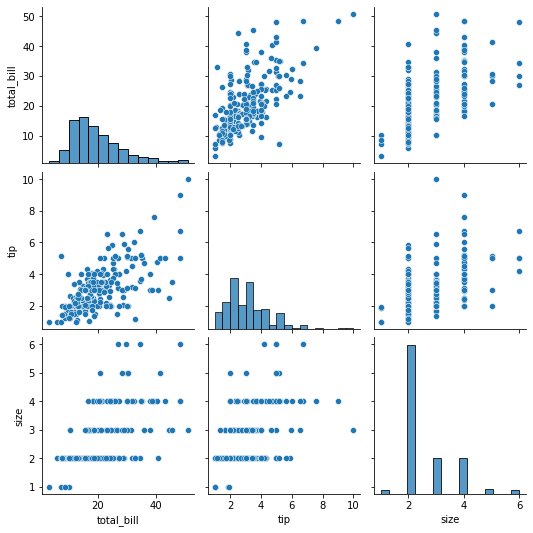

In [20]:
sns.pairplot(tips)